In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  sample_data/


In [ ]:
!pip uninstall folium==0.8.3
!pip install folium==0.2.1

Found existing installation: folium 0.8.3
Uninstalling folium-0.8.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/folium-0.8.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/folium/*
Proceed (y/n)? y
  Successfully uninstalled folium-0.8.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 9.0 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=e8a503e7fa6a9ebf8d7d3663adfffb4aaebc3263a9d66a5353dc1e3189fbf349
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium


In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 43 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (61.8 MB/s)
(Reading database ... 155632 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155610 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [ ]:
!pip install -q tflite-model-maker
!pip install -q tflite-support

     |████████████████████████████████| 642 kB 32.1 MB/s 
     |████████████████████████████████| 42.5 MB 1.1 MB/s 
     |████████████████████████████████| 840 kB 61.1 MB/s 
     |████████████████████████████████| 6.4 MB 25.4 MB/s 
     |████████████████████████████████| 1.2 MB 58.1 MB/s 
     |████████████████████████████████| 237 kB 75.4 MB/s 
     |████████████████████████████████| 596 kB 4.4 MB/s 
     |████████████████████████████████| 120 kB 53.8 MB/s 
     |████████████████████████████████| 77 kB 3.0 MB/s 
     |████████████████████████████████| 3.4 MB 55.6 MB/s 
     |████████████████████████████████| 87 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 22.1 MB/s 
     |████████████████████████████████| 11.2 MB 21.7 MB/s 
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 48.3 MB 1.3 MB/s 
     |████████████████████████████████| 99 kB 11.4 MB/s 
     |████████████████████████████████| 352 kB 64.0 MB/s 
     |█████████████

In [ ]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat, QuantizationConfig
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

from tflite_support import metadata

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
train_data = object_detector.DataLoader.from_pascal_voc(
    'drive/MyDrive/new_deepPCB/train',
    'drive/MyDrive/new_deepPCB/train',
    ['pin-hole', 'mousebite', 'spur', 'open', 
     'copper', 'short'])
validation_data = object_detector.DataLoader.from_pascal_voc(
    'drive/MyDrive/new_deepPCB/validate',
    'drive/MyDrive/new_deepPCB/validate',
    ['pin-hole', 'mousebite', 'spur', 'open', 
     'copper', 'short'])
test_data = object_detector.DataLoader.from_pascal_voc(
    'drive/MyDrive/new_deepPCB/test',
    'drive/MyDrive/new_deepPCB/test',
    ['pin-hole', 'mousebite', 'spur', 'open', 
     'copper', 'short'])

In [ ]:
spec = model_spec.get('efficientdet_lite4')

In [ ]:
model = object_detector.create(train_data, model_spec=spec, batch_size=4, train_whole_model=True, epochs=20, validation_data=validation_data)

Epoch 1/20
294/294 [==============================] - 347s 959ms/step - det_loss: 1.0996 - cls_loss: 0.7399 - box_loss: 0.0072 - reg_l2_loss: 0.1086 - loss: 1.2082 - learning_rate: 0.0065 - gradient_norm: 3.5572 - val_det_loss: 0.5698 - val_cls_loss: 0.3429 - val_box_loss: 0.0045 - val_reg_l2_loss: 0.1088 - val_loss: 0.6786
Epoch 2/20
294/294 [==============================] - 279s 949ms/step - det_loss: 0.5850 - cls_loss: 0.3898 - box_loss: 0.0039 - reg_l2_loss: 0.1089 - loss: 0.6939 - learning_rate: 0.0049 - gradient_norm: 4.5270 - val_det_loss: 0.3317 - val_cls_loss: 0.2448 - val_box_loss: 0.0017 - val_reg_l2_loss: 0.1090 - val_loss: 0.4407
Epoch 3/20
294/294 [==============================] - 279s 949ms/step - det_loss: 0.4786 - cls_loss: 0.3158 - box_loss: 0.0033 - reg_l2_loss: 0.1090 - loss: 0.5876 - learning_rate: 0.0048 - gradient_norm: 4.2439 - val_det_loss: 0.3364 - val_cls_loss: 0.2509 - val_box_loss: 0.0017 - val_reg_l2_loss: 0.1091 - val_loss: 0.4455
Epoch 4/20
294/294 [==

In [ ]:
model.export(export_dir='.', tflite_filename='pcb_data_v3.tflite')

In [ ]:
from google.colab import files
files.download('pcb_data_v3.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.evaluate(test_data)

1/1 [==============================] - 18s 18s/step



{'AP': 0.7179705,
 'AP50': 0.9694887,
 'AP75': 0.8623749,
 'AP_/copper': 0.83615786,
 'AP_/mousebite': 0.69505036,
 'AP_/open': 0.67283374,
 'AP_/pin-hole': 0.78000414,
 'AP_/short': 0.62601155,
 'AP_/spur': 0.6977654,
 'APl': 0.75,
 'APm': 0.7388278,
 'APs': 0.7249257,
 'ARl': 0.8,
 'ARm': 0.82125163,
 'ARmax1': 0.5949857,
 'ARmax10': 0.7985698,
 'ARmax100': 0.80921644,
 'ARs': 0.79992473}

In [ ]:
model.evaluate_tflite('pcb_data_v3.tflite', test_data)

49/49 [==============================] - 100s 2s/step



{'AP': 0.71049577,
 'AP50': 0.96469307,
 'AP75': 0.84565234,
 'AP_/copper': 0.813817,
 'AP_/mousebite': 0.69169086,
 'AP_/open': 0.6735331,
 'AP_/pin-hole': 0.7754469,
 'AP_/short': 0.6277714,
 'AP_/spur': 0.6807155,
 'APl': 0.7,
 'APm': 0.72466457,
 'APs': 0.7263713,
 'ARl': 0.7,
 'ARm': 0.7681749,
 'ARmax1': 0.58949023,
 'ARmax10': 0.7668318,
 'ARmax100': 0.76704824,
 'ARs': 0.7750244}

In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.6.0.66.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-d21001fc.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
!pip install opencv-python-headless==4.5.2.52

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.2 MB 1.2 MB/s 


In [ ]:
#@title Load the trained TFLite model and define some visualization functions

#@markdown This code comes from the TFLite Object Detection [Raspberry Pi sample](https://github.com/tensorflow/examples/tree/master/lite/examples/object_detection/raspberry_pi).

import platform
from typing import List, NamedTuple
import json

import cv2

Interpreter = tf.lite.Interpreter
load_delegate = tf.lite.experimental.load_delegate

# pylint: enable=g-import-not-at-top


class ObjectDetectorOptions(NamedTuple):
  """A config to initialize an object detector."""

  enable_edgetpu: bool = False
  """Enable the model to run on EdgeTPU."""

  label_allow_list: List[str] = None
  """The optional allow list of labels."""

  label_deny_list: List[str] = None
  """The optional deny list of labels."""

  max_results: int = -1
  """The maximum number of top-scored detection results to return."""

  num_threads: int = 1
  """The number of CPU threads to be used."""

  score_threshold: float = 0.0
  """The score threshold of detection results to return."""


class Rect(NamedTuple):
  """A rectangle in 2D space."""
  left: float
  top: float
  right: float
  bottom: float


class Category(NamedTuple):
  """A result of a classification task."""
  label: str
  score: float
  index: int


class Detection(NamedTuple):
  """A detected object as the result of an ObjectDetector."""
  bounding_box: Rect
  categories: List[Category]


def edgetpu_lib_name():
  """Returns the library name of EdgeTPU in the current platform."""
  return {
      'Darwin': 'libedgetpu.1.dylib',
      'Linux': 'libedgetpu.so.1',
      'Windows': 'edgetpu.dll',
  }.get(platform.system(), None)


class ObjectDetector:
  """A wrapper class for a TFLite object detection model."""

  _OUTPUT_LOCATION_NAME = 'location'
  _OUTPUT_CATEGORY_NAME = 'category'
  _OUTPUT_SCORE_NAME = 'score'
  _OUTPUT_NUMBER_NAME = 'number of detections'

  def __init__(
      self,
      model_path: str,
      options: ObjectDetectorOptions = ObjectDetectorOptions()
  ) -> None:
    """Initialize a TFLite object detection model.
    Args:
        model_path: Path to the TFLite model.
        options: The config to initialize an object detector. (Optional)
    Raises:
        ValueError: If the TFLite model is invalid.
        OSError: If the current OS isn't supported by EdgeTPU.
    """

    # Load metadata from model.
    displayer = metadata.MetadataDisplayer.with_model_file(model_path)

    # Save model metadata for preprocessing later.
    model_metadata = json.loads(displayer.get_metadata_json())
    process_units = model_metadata['subgraph_metadata'][0]['input_tensor_metadata'][0]['process_units']
    mean = 0.0
    std = 1.0
    for option in process_units:
      if option['options_type'] == 'NormalizationOptions':
        mean = option['options']['mean'][0]
        std = option['options']['std'][0]
    self._mean = mean
    self._std = std

    # Load label list from metadata.
    file_name = displayer.get_packed_associated_file_list()[0]
    label_map_file = displayer.get_associated_file_buffer(file_name).decode()
    label_list = list(filter(lambda x: len(x) > 0, label_map_file.splitlines()))
    self._label_list = label_list

    # Initialize TFLite model.
    if options.enable_edgetpu:
      if edgetpu_lib_name() is None:
        raise OSError("The current OS isn't supported by Coral EdgeTPU.")
      interpreter = Interpreter(
          model_path=model_path,
          experimental_delegates=[load_delegate(edgetpu_lib_name())],
          num_threads=options.num_threads)
    else:
      interpreter = Interpreter(
          model_path=model_path, num_threads=options.num_threads)

    interpreter.allocate_tensors()
    input_detail = interpreter.get_input_details()[0]

    # From TensorFlow 2.6, the order of the outputs become undefined.
    # Therefore we need to sort the tensor indices of TFLite outputs and to know
    # exactly the meaning of each output tensor. For example, if
    # output indices are [601, 599, 598, 600], tensor names and indices aligned
    # are:
    #   - location: 598
    #   - category: 599
    #   - score: 600
    #   - detection_count: 601
    # because of the op's ports of TFLITE_DETECTION_POST_PROCESS
    # (https://github.com/tensorflow/tensorflow/blob/a4fe268ea084e7d323133ed7b986e0ae259a2bc7/tensorflow/lite/kernels/detection_postprocess.cc#L47-L50).
    sorted_output_indices = sorted(
        [output['index'] for output in interpreter.get_output_details()])
    self._output_indices = {
        self._OUTPUT_LOCATION_NAME: sorted_output_indices[0],
        self._OUTPUT_CATEGORY_NAME: sorted_output_indices[1],
        self._OUTPUT_SCORE_NAME: sorted_output_indices[2],
        self._OUTPUT_NUMBER_NAME: sorted_output_indices[3],
    }

    self._input_size = input_detail['shape'][2], input_detail['shape'][1]
    self._is_quantized_input = input_detail['dtype'] == np.uint8
    self._interpreter = interpreter
    self._options = options

  def detect(self, input_image: np.ndarray) -> List[Detection]:
    """Run detection on an input image.
    Args:
        input_image: A [height, width, 3] RGB image. Note that height and width
          can be anything since the image will be immediately resized according
          to the needs of the model within this function.
    Returns:
        A Person instance.
    """
    image_height, image_width, _ = input_image.shape

    input_tensor = self._preprocess(input_image)

    self._set_input_tensor(input_tensor)
    self._interpreter.invoke()

    # Get all output details
    boxes = self._get_output_tensor(self._OUTPUT_LOCATION_NAME)
    classes = self._get_output_tensor(self._OUTPUT_CATEGORY_NAME)
    scores = self._get_output_tensor(self._OUTPUT_SCORE_NAME)
    count = int(self._get_output_tensor(self._OUTPUT_NUMBER_NAME))

    return self._postprocess(boxes, classes, scores, count, image_width,
                             image_height)

  def _preprocess(self, input_image: np.ndarray) -> np.ndarray:
    """Preprocess the input image as required by the TFLite model."""

    # Resize the input
    input_tensor = cv2.resize(input_image, self._input_size)

    # Normalize the input if it's a float model (aka. not quantized)
    if not self._is_quantized_input:
      input_tensor = (np.float32(input_tensor) - self._mean) / self._std

    # Add batch dimension
    input_tensor = np.expand_dims(input_tensor, axis=0)

    return input_tensor

  def _set_input_tensor(self, image):
    """Sets the input tensor."""
    tensor_index = self._interpreter.get_input_details()[0]['index']
    input_tensor = self._interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image

  def _get_output_tensor(self, name):
    """Returns the output tensor at the given index."""
    output_index = self._output_indices[name]
    tensor = np.squeeze(self._interpreter.get_tensor(output_index))
    return tensor

  def _postprocess(self, boxes: np.ndarray, classes: np.ndarray,
                   scores: np.ndarray, count: int, image_width: int,
                   image_height: int) -> List[Detection]:
    """Post-process the output of TFLite model into a list of Detection objects.
    Args:
        boxes: Bounding boxes of detected objects from the TFLite model.
        classes: Class index of the detected objects from the TFLite model.
        scores: Confidence scores of the detected objects from the TFLite model.
        count: Number of detected objects from the TFLite model.
        image_width: Width of the input image.
        image_height: Height of the input image.
    Returns:
        A list of Detection objects detected by the TFLite model.
    """
    results = []

    # Parse the model output into a list of Detection entities.
    for i in range(count):
      if scores[i] >= self._options.score_threshold:
        y_min, x_min, y_max, x_max = boxes[i]
        bounding_box = Rect(
            top=int(y_min * image_height),
            left=int(x_min * image_width),
            bottom=int(y_max * image_height),
            right=int(x_max * image_width))
        class_id = int(classes[i])
        category = Category(
            score=scores[i],
            label=self._label_list[class_id],  # 0 is reserved for background
            index=class_id)
        result = Detection(bounding_box=bounding_box, categories=[category])
        results.append(result)

    # Sort detection results by score ascending
    sorted_results = sorted(
        results,
        key=lambda detection: detection.categories[0].score,
        reverse=True)

    # Filter out detections in deny list
    filtered_results = sorted_results
    if self._options.label_deny_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label not in self.
              _options.label_deny_list, filtered_results))

    # Keep only detections in allow list
    if self._options.label_allow_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label in self._options.
              label_allow_list, filtered_results))

    # Only return maximum of max_results detection.
    if self._options.max_results > 0:
      result_count = min(len(filtered_results), self._options.max_results)
      filtered_results = filtered_results[:result_count]

    return filtered_results


_MARGIN = 10  # pixels
_ROW_SIZE = 10  # pixels
_FONT_SIZE = 1
_FONT_THICKNESS = 1
_TEXT_COLOR = (0, 0, 255)  # red


def visualize(
    image: np.ndarray,
    detections: List[Detection],
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detections: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detections:
    # Draw bounding_box
    start_point = detection.bounding_box.left, detection.bounding_box.top
    end_point = detection.bounding_box.right, detection.bounding_box.bottom
    cv2.rectangle(image, start_point, end_point, _TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    class_name = category.label
    probability = round(category.score, 2)
    result_text = class_name + ' (' + str(probability) + ')'
    text_location = (_MARGIN + detection.bounding_box.left,
                     _MARGIN + _ROW_SIZE + detection.bounding_box.top)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                _FONT_SIZE, _TEXT_COLOR, _FONT_THICKNESS)

  return image

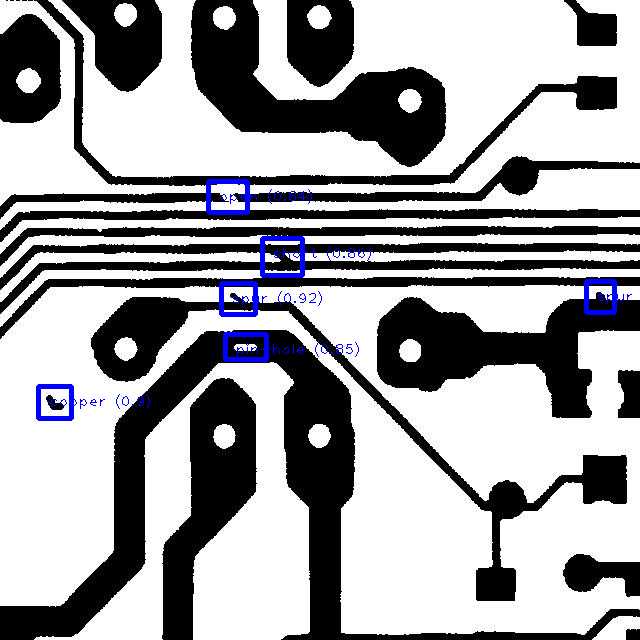

In [ ]:
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt

INPUT_IMAGE_URL = "http://download.tensorflow.org/example_images/android_figurine.jpg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.5 #@param {type:"number"}
TFLITE_MODEL_PATH = "./drive/MyDrive/pcb_data_v3.tflite" #@param {type:"string"}

TEMP_FILE = './drive/MyDrive/00041058_test.jpg'

# !wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
image = cv2.imread(TEMP_FILE)
image_np = np.asarray(image)

# Load the TFLite model
options = ObjectDetectorOptions(
      num_threads=4,
      score_threshold=DETECTION_THRESHOLD,
)
detector = ObjectDetector(model_path=TFLITE_MODEL_PATH, options=options)

# Run object detection estimation using the model.
detections = detector.detect(image_np)

# Draw keypoints and edges on input image
image_np = visualize(image_np, detections)

# Show the detection result
Image.fromarray(image_np)

In [ ]:
#--------------------------------END-------------------------------------------

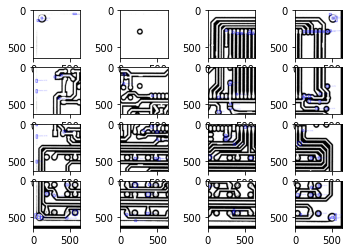

In [ ]:
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt

INPUT_IMAGE_URL = "http://download.tensorflow.org/example_images/android_figurine.jpg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.5 #@param {type:"number"}
TFLITE_MODEL_PATH = "./drive/MyDrive/pcb_data_v3.tflite" #@param {type:"string"}

TEMP_FILE = './drive/MyDrive/12_spur_09.jpg'

# !wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
image = cv2.imread(TEMP_FILE)
bw = cv2.threshold(image, 70, 255, cv2.THRESH_BINARY)
(B, G, R) = cv2.split(bw[1])
new_image = cv2.merge([G, G, G])

#image = Image.open(TEMP_FILE).convert('RGB')
#image.thumbnail((512, 512), Image.ANTIALIAS)
img = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
im = Image.fromarray(img)
width, height = im.size

images = []
# i - rows 
# j - columns
for i in range(height//640+1):
  for j in range(width//640+1):
    image_np = np.asarray(im.crop((j*640, 
                        i*640, (j*640)+640, (i*640)+640)))
    images.append(image_np)

# Load the TFLite model
options = ObjectDetectorOptions(
      num_threads=4,
      score_threshold=DETECTION_THRESHOLD,
)
detector = ObjectDetector(model_path=TFLITE_MODEL_PATH, options=options)

output = []
for i in images:
  # Run object detection estimation using the model.
  detections = detector.detect(i)

  # Draw keypoints and edges on input image
  image_np = visualize(i, detections)

  # Show the detection result
  output.append(Image.fromarray(image_np))

for i in range(len(output)):
  plt.subplot(height//640+1, width//640+1, i+1)
  plt.imshow(output[i])

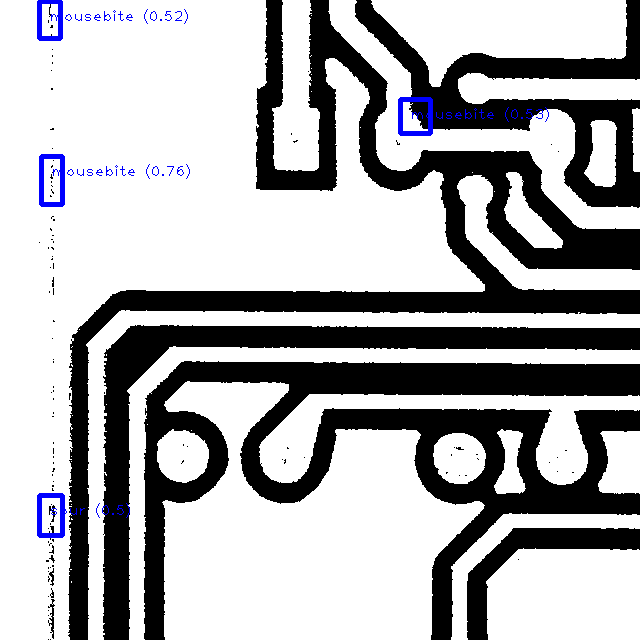

In [ ]:
from google.colab.patches import cv2_imshow
import numpy
open_cv_image = numpy.array(output[8]) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 
cv2_imshow(open_cv_image)